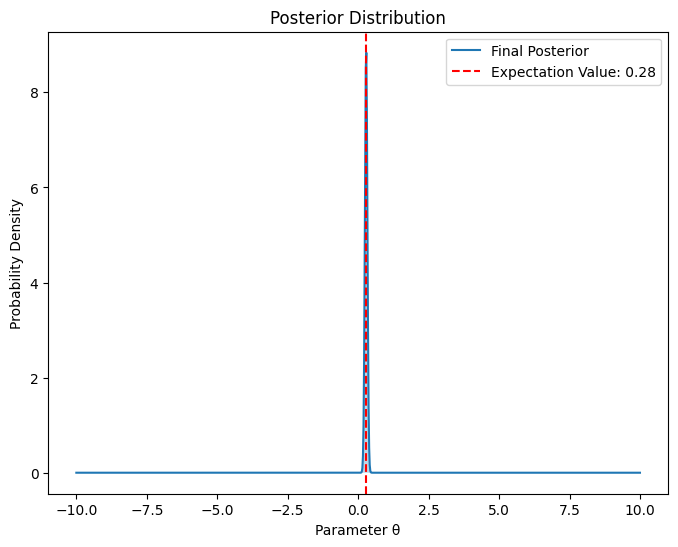

In [6]:
#task1a 

import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import norm

#load data 
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return np.array(data)

#assuming gaussian
def likelihood(data, theta, sigma=1.0):
    return np.prod(norm.pdf(data, loc=theta, scale=sigma))

#initial uniform distribution
def prior(theta_range):
    return np.ones_like(theta_range) / len(theta_range)


def update_posterior(prior_dist, theta_range, data_batch, sigma=1.0):
    likelihoods = np.array([likelihood(data_batch, theta, sigma) for theta in theta_range])
    posterior = likelihoods * prior_dist
    posterior /= np.trapz(posterior, theta_range)  # Normalize
    return posterior

#variance estimation
def fisher_information(theta_range, posterior):
    dp_dtheta = np.gradient(np.log(posterior + 1e-8), theta_range)  
    fim = np.trapz(dp_dtheta**2 * posterior, theta_range)
    return 1 / fim if fim > 0 else np.inf  #inverse of Fisher Information gives the variance


def bayesian_inference(file_path, batch_size=50, theta_min=-10, theta_max=10, theta_points=1000):
    data = load_data(file_path)
    theta_range = np.linspace(theta_min, theta_max, theta_points)
    posterior = prior(theta_range)
    
    variances = []
    
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        posterior = update_posterior(posterior, theta_range, batch)
        variance = fisher_information(theta_range, posterior)
        variances.append(variance)
    
    expectation_value = np.trapz(theta_range * posterior, theta_range)
    variance_final = np.trapz((theta_range - expectation_value)**2 * posterior, theta_range)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(theta_range, posterior, label=f'Final Posterior')
    plt.axvline(expectation_value, color='r', linestyle='--', label=f'Expectation Value: {expectation_value:.2f}')
    plt.fill_between(theta_range, posterior, alpha=0.3)
    plt.xlabel('Parameter θ')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.title('Posterior Distribution')
    plt.savefig('posterior_distribution.png')  
    plt.show()
    
    return expectation_value, variance_final, variances


expectation, variance, all_variances = bayesian_inference('dataset_3.json')


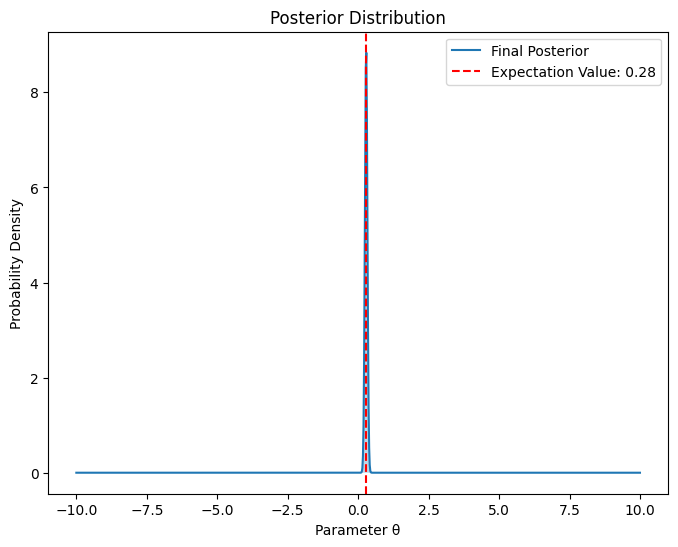

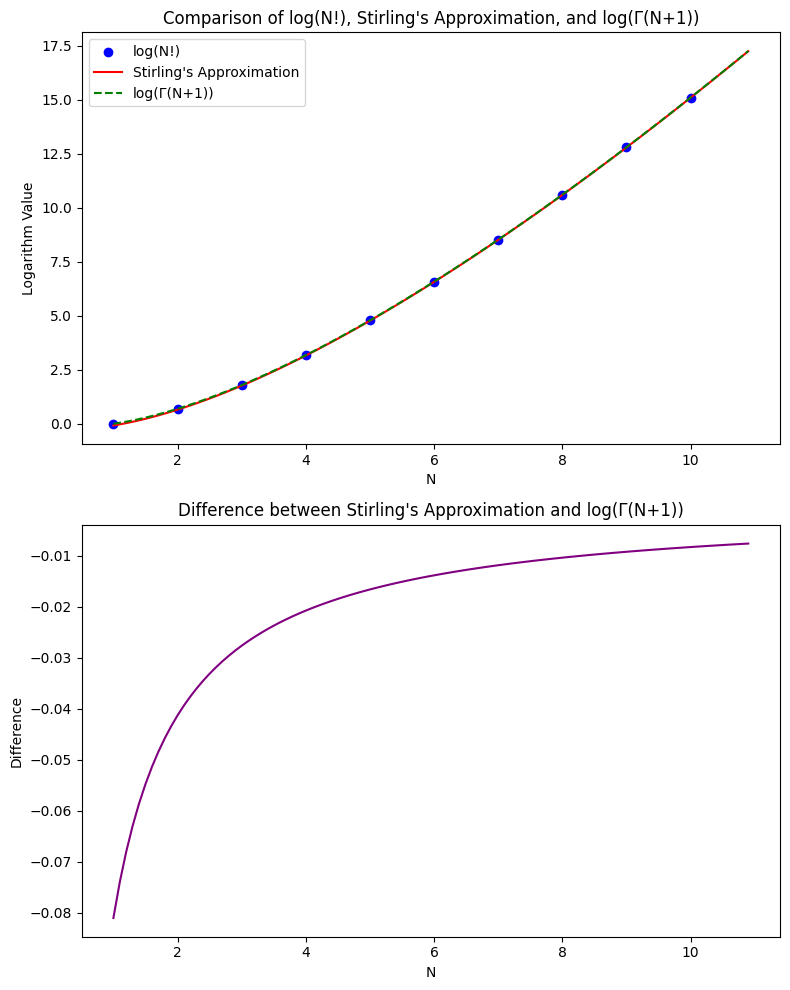

In [9]:
#task1b 

import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gamma, factorial


def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return np.array(data)

#assuming gaussian 
def likelihood(data, theta, sigma=1.0):
    return np.prod(norm.pdf(data, loc=theta, scale=sigma))

#initial uniform distribution
def prior(theta_range):
    return np.ones_like(theta_range) / len(theta_range)


def update_posterior(prior_dist, theta_range, data_batch, sigma=1.0):
    likelihoods = np.array([likelihood(data_batch, theta, sigma) for theta in theta_range])
    posterior = likelihoods * prior_dist
    posterior /= np.trapz(posterior, theta_range)  
    return posterior

#variance estimation
def fisher_information(theta_range, posterior):
    dp_dtheta = np.gradient(np.log(posterior + 1e-8), theta_range)  
    fim = np.trapz(dp_dtheta**2 * posterior, theta_range)
    return 1 / fim if fim > 0 else np.inf  #inverse of Fisher Information gives the variance


def bayesian_inference(file_path, batch_size=50, theta_min=-10, theta_max=10, theta_points=1000):
    data = load_data(file_path)
    theta_range = np.linspace(theta_min, theta_max, theta_points)
    posterior = prior(theta_range)
    
    variances = []
    
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        posterior = update_posterior(posterior, theta_range, batch)
        variance = fisher_information(theta_range, posterior)
        variances.append(variance)
    
    expectation_value = np.trapz(theta_range * posterior, theta_range)
    variance_final = np.trapz((theta_range - expectation_value)**2 * posterior, theta_range)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(theta_range, posterior, label=f'Final Posterior')
    plt.axvline(expectation_value, color='r', linestyle='--', label=f'Expectation Value: {expectation_value:.2f}')
    plt.fill_between(theta_range, posterior, alpha=0.3)
    plt.xlabel('Parameter θ')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.title('Posterior Distribution')
    plt.savefig('posterior_distribution.png')  
    plt.show()
    
    return expectation_value, variance_final, variances


def stirling_approximation(N):
    return N * np.log(N) - N + 0.5 * np.log(2 * np.pi * N)

#plot comparison between factorial, Stirling’s, and Gamma 
def plot_stirling_approximation():
    N_values = np.arange(1, 11, 0.1)
    factorial_values = np.log(factorial(N_values.astype(int)))
    stirling_values = stirling_approximation(N_values)
    gamma_values = np.log(gamma(N_values + 1))
    
    fig, axes = plt.subplots(2, 1, figsize=(8, 10))
    
    #Factorial vs. Stirling's and Gamma 
    axes[0].scatter(range(1, 11), np.log(factorial(np.arange(1, 11))), label='log(N!)', color='blue')
    axes[0].plot(N_values, stirling_values, label="Stirling's Approximation", color='red')
    axes[0].plot(N_values, gamma_values, label='log(Γ(N+1))', linestyle='dashed', color='green')
    axes[0].set_xlabel('N')
    axes[0].set_ylabel('Logarithm Value')
    axes[0].legend()
    axes[0].set_title("Comparison of log(N!), Stirling's Approximation, and log(Γ(N+1))")
    
    #difference between Stirling's and Gamma 
    difference = stirling_values - gamma_values
    axes[1].plot(N_values, difference, color='purple')
    axes[1].set_xlabel('N')
    axes[1].set_ylabel('Difference')
    axes[1].set_title("Difference between Stirling's Approximation and log(Γ(N+1))")
    
    plt.tight_layout()
    plt.savefig('stirling_approximation.png')  
    plt.show()


expectation, variance, all_variances = bayesian_inference('dataset_3.json') 
plot_stirling_approximation()


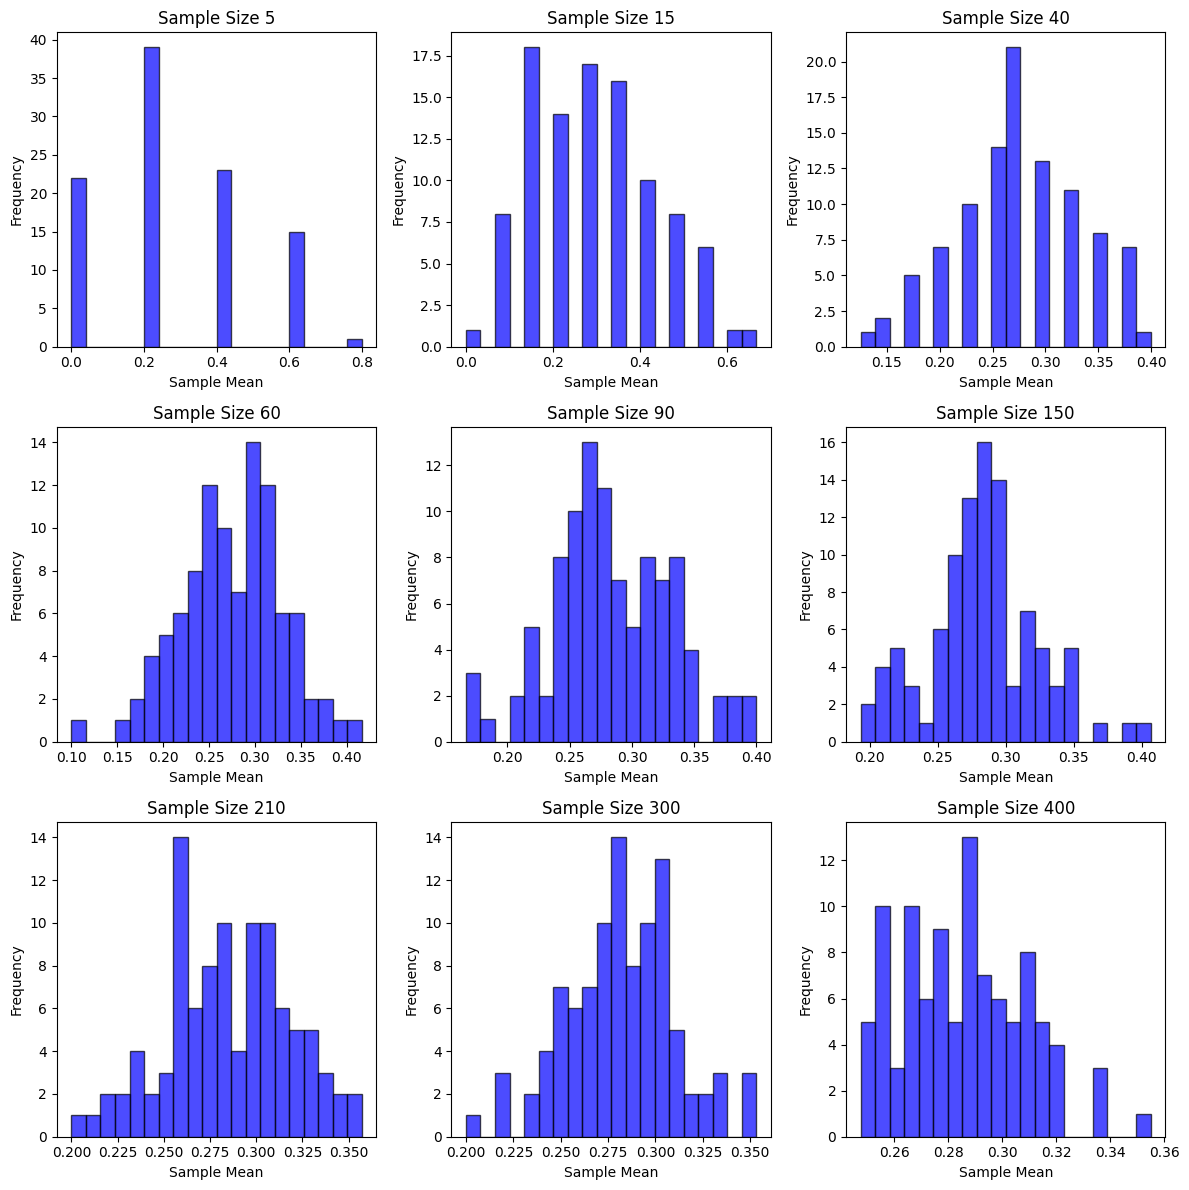

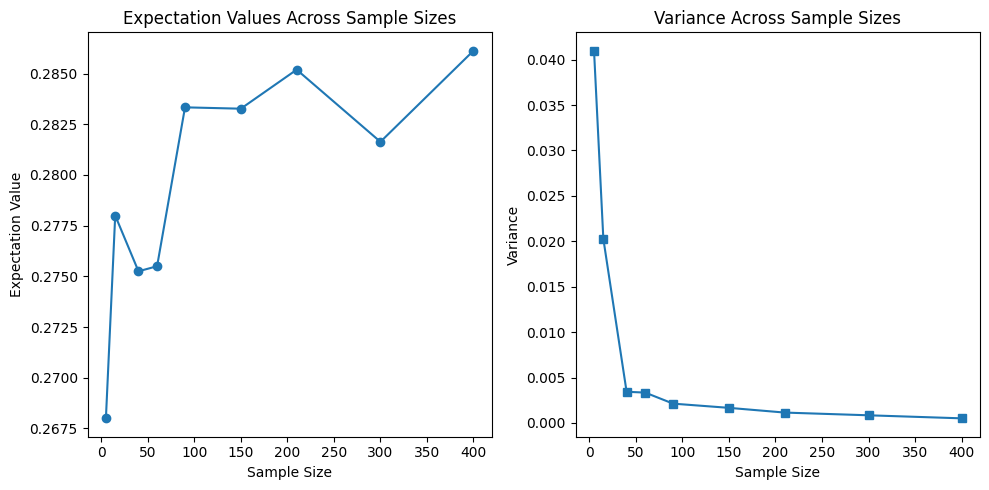

In [14]:
#task 2 

import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gamma, factorial


 

def bootstrap_analysis(data, sample_sizes, num_bootstrap=100):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()
    
    expectation_values = []
    variances = []
    
    for idx, size in enumerate(sample_sizes):
        means = [np.mean(np.random.choice(data, size=size, replace=True)) for _ in range(num_bootstrap)]
        expectation_values.append(np.mean(means))
        variances.append(np.var(means))
        
        axes[idx].hist(means, bins=20, alpha=0.7, color='b', edgecolor='black')
        axes[idx].set_title(f'Sample Size {size}')
        axes[idx].set_xlabel('Sample Mean')
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('bootstrap_histograms.png')  # Save the plot
    plt.show()
    
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, expectation_values, marker='o', linestyle='-')
    plt.xlabel('Sample Size')
    plt.ylabel('Expectation Value')
    plt.title('Expectation Values Across Sample Sizes')
    
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, variances, marker='s', linestyle='-')
    plt.xlabel('Sample Size')
    plt.ylabel('Variance')
    plt.title('Variance Across Sample Sizes')
    
    plt.tight_layout()
    plt.savefig('bootstrap_expectation_variance.png')  
    plt.show()


 
bootstrap_analysis(load_data('dataset_3.json'), [5, 15, 40, 60, 90, 150, 210, 300, 400])


In [17]:
#task2ab 

import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import norm, expon
from scipy.special import gamma, factorial
from scipy.optimize import minimize
from scipy.stats import norm, expon, ttest_ind

def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return np.array(data)

#for exponential decay
def neg_log_likelihood_exp(lambda_, data):
    return -np.sum(np.log(expon.pdf(data, scale=1/lambda_)))

#for Gaussian distribution
def neg_log_likelihood_gaussian(params, data):
    mu, sigma = params
    return -np.sum(np.log(norm.pdf(data, loc=mu, scale=sigma)))


def fisher_information_exp(lambda_, data):
    n = len(data)
    fim = n / lambda_**2
    return 1 / fim  


def fisher_information_gaussian(mu, sigma, data):
    n = len(data)
    fim = np.array([[n / sigma**2, 0], [0, n / (2 * sigma**2)]] )
    return np.linalg.inv(fim)  

#estimate decay parameters
def estimate_parameters(vacuum_file, cavity_file):
    vacuum_data = load_data(vacuum_file)
    cavity_data = load_data(cavity_file)
    
    
    lambda_vacuum_init = 1 / np.mean(vacuum_data)
    result_vacuum = minimize(neg_log_likelihood_exp, lambda_vacuum_init, args=(vacuum_data,), bounds=[(1e-6, None)])
    lambda_vacuum = result_vacuum.x[0]
    var_lambda_vacuum = fisher_information_exp(lambda_vacuum, vacuum_data)
    
    mu_init, sigma_init = np.mean(cavity_data), np.std(cavity_data)
    result_cavity = minimize(neg_log_likelihood_gaussian, [mu_init, sigma_init], args=(cavity_data,), bounds=[(None, None), (1e-6, None)])
    mu_cavity, sigma_cavity = result_cavity.x
    var_params_cavity = fisher_information_gaussian(mu_cavity, sigma_cavity, cavity_data) 

    # Hypothesis testing for additional decay contribution
    null_hypothesis = "There is no additional decay contribution in the optical cavity"
    t_stat, p_value = ttest_ind(vacuum_data, cavity_data, equal_var=False)
    reject_null = p_value < 0.05
    
    
    print(f"Vacuum Decay Constant (λ): {lambda_vacuum:.4f}, Variance: {var_lambda_vacuum:.4f}")
    print(f"Cavity Gaussian Parameters: μ = {mu_cavity:.4f}, σ = {sigma_cavity:.4f}")
    print(f"Fisher Information Variance Estimate (Cavity):\n{var_params_cavity}") 
    print(f"Null Hypothesis: {null_hypothesis}")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject Null Hypothesis: {reject_null}")
    
    return lambda_vacuum, var_lambda_vacuum, mu_cavity, sigma_cavity, var_params_cavity, p_value, reject_null


estimate_parameters('Vacuum_decay_dataset.json', 'Cavity_decay_dataset.json')


Vacuum Decay Constant (λ): 0.4439, Variance: 0.0000
Cavity Gaussian Parameters: μ = 3.2159, σ = 2.2543
Fisher Information Variance Estimate (Cavity):
[[4.04641636e-05 0.00000000e+00]
 [0.00000000e+00 8.09283272e-05]]
Null Hypothesis: There is no additional decay contribution in the optical cavity
p-value: 0.0000
Reject Null Hypothesis: True


(0.4438527907779293,
 1.568700878937423e-06,
 3.215939790381908,
 2.254260850664528,
 array([[4.04641636e-05, 0.00000000e+00],
        [0.00000000e+00, 8.09283272e-05]]),
 0.0,
 True)